<a href="https://colab.research.google.com/github/IvanG17/SVR_Stocks/blob/main/SPY_SVR_condensed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
from sklearn.svm import SVR
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime


In [ ]:
import yfinance as yf

In [ ]:
ticker = 'SPY'
SPYData = yf.Ticker(ticker)

In [ ]:
amzn_df = SPYData.history(period='1d', start= '2011-1-1', end = '2021-5-18')

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.501668,104.228654,102.676658,103.779396,138725200,0.0,0
2011-01-04,104.008091,104.040765,103.076895,103.722198,137409700,0.0,0
2011-01-05,103.395475,104.326671,103.297452,104.261322,133975300,0.0,0
2011-01-06,104.302168,104.416525,103.746717,104.057114,122519000,0.0,0
2011-01-07,104.195953,104.367489,103.044214,103.852882,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0


In [ ]:
for col in amzn_df.columns:
  print (col)

Open
High
Low
Close
Volume
Dividends
Stock Splits


In [ ]:
amzn_df.reset_index(inplace=True)
amzn_df.set_index('Date', inplace=True)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.501668,104.228654,102.676658,103.779396,138725200,0.0,0
2011-01-04,104.008091,104.040765,103.076895,103.722198,137409700,0.0,0
2011-01-05,103.395475,104.326671,103.297452,104.261322,133975300,0.0,0
2011-01-06,104.302168,104.416525,103.746717,104.057114,122519000,0.0,0
2011-01-07,104.195953,104.367489,103.044214,103.852882,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0


In [ ]:
df_Open=amzn_df[['Open']]
df_dates=amzn_df.index.to_frame().reset_index(drop=True)
print(df_dates)

           Date
0    2011-01-03
1    2011-01-04
2    2011-01-05
3    2011-01-06
4    2011-01-07
...         ...
2605 2021-05-11
2606 2021-05-12
2607 2021-05-13
2608 2021-05-14
2609 2021-05-17

[2610 rows x 1 columns]


In [ ]:
#amzn_df = pd.concat([amzn_df, df_dates])

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-01-03,103.501668,104.228654,102.676658,103.779396,138725200,0.0,0
2011-01-04,104.008091,104.040765,103.076895,103.722198,137409700,0.0,0
2011-01-05,103.395475,104.326671,103.297452,104.261322,133975300,0.0,0
2011-01-06,104.302168,104.416525,103.746717,104.057114,122519000,0.0,0
2011-01-07,104.195953,104.367489,103.044214,103.852882,156034600,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0


In [ ]:
 #df_dates['Date']

In [ ]:
#a#mzn_df=amzn_df.append(df_dates)

In [ ]:
amzn_df['Date']= df_dates['Date'].values

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2011-01-03,103.501668,104.228654,102.676658,103.779396,138725200,0.0,0,2011-01-03
2011-01-04,104.008091,104.040765,103.076895,103.722198,137409700,0.0,0,2011-01-04
2011-01-05,103.395475,104.326671,103.297452,104.261322,133975300,0.0,0,2011-01-05
2011-01-06,104.302168,104.416525,103.746717,104.057114,122519000,0.0,0,2011-01-06
2011-01-07,104.195953,104.367489,103.044214,103.852882,156034600,0.0,0,2011-01-07
...,...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0,2021-05-11
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0,2021-05-12
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0,2021-05-13


In [ ]:
amzn_df['Date'] = amzn_df['Date'].astype(str)

In [ ]:
amzn_df['new_date'] = amzn_df['Date'].str.replace('\D', '').astype(int)

In [ ]:
amzn_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2011-01-03,103.501668,104.228654,102.676658,103.779396,138725200,0.0,0,2011-01-03,20110103
2011-01-04,104.008091,104.040765,103.076895,103.722198,137409700,0.0,0,2011-01-04,20110104
2011-01-05,103.395475,104.326671,103.297452,104.261322,133975300,0.0,0,2011-01-05,20110105
2011-01-06,104.302168,104.416525,103.746717,104.057114,122519000,0.0,0,2011-01-06,20110106
2011-01-07,104.195953,104.367489,103.044214,103.852882,156034600,0.0,0,2011-01-07,20110107
...,...,...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0,2021-05-11,20210511
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0,2021-05-12,20210512
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0,2021-05-13,20210513


In [ ]:
actual_price = amzn_df.tail(1)
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,415.390015,416.390015,413.359985,415.519989,65129200,0.0,0,2021-05-17,20210517


In [ ]:
x=actual_price['Close']
list2=[]
list2.append(x)
list2

y= 1+ list2[0]
print(list2[0])
print(y)

len(list2)


Date
2021-05-17    415.519989
Name: Close, dtype: float64
Date
2021-05-17    416.519989
Name: Close, dtype: float64


1

In [ ]:
amzn_df = amzn_df.head(len(amzn_df)-1)

In [ ]:
days = list()
close_prices= list()

In [ ]:
df_days = amzn_df.loc[:,'new_date']
df_days

Date
2011-01-03    20110103
2011-01-04    20110104
2011-01-05    20110105
2011-01-06    20110106
2011-01-07    20110107
                ...   
2021-05-10    20210510
2021-05-11    20210511
2021-05-12    20210512
2021-05-13    20210513
2021-05-14    20210514
Name: new_date, Length: 2609, dtype: int64

In [ ]:
df_close_price = amzn_df.loc[:,'Close']

In [ ]:
for dates in df_days:
  days.append([int(dates)])

days

In [ ]:
for price in df_close_price: 
  close_prices.append(float(price))

close_prices

In [ ]:
print(days)
print(close_prices)

print(len(days))
print(len(close_prices))

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 1E-5)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

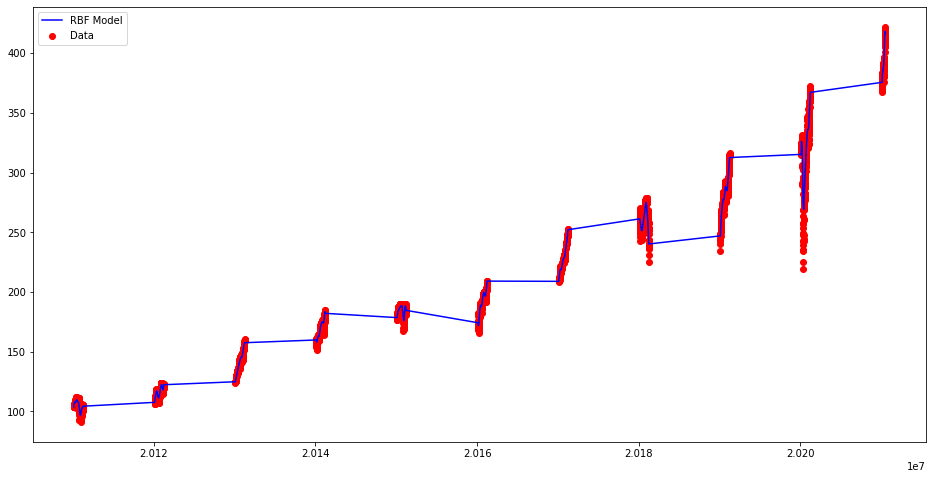

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
actual_price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,415.390015,416.390015,413.359985,415.519989,65129200,0.0,0,2021-05-17,20210517


In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [415.82094305]
The percent error for this is:  87.28527964403136 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [418.01408197]
The percent error for this is:  87.2188053968547 %


In [ ]:
tomorrow = [[20210506]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
print('It\'s predicted to drop: ' , float(((3146.3458-3249.386427)/3146.3458)*100), '%')

The predicted value on 2021-05-06 from the rbf model is:  [417.86269509]
It's predicted to drop:  -3.2749301427706974 %


# RBF Unfixed

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.15)
rbf.fit(days, close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

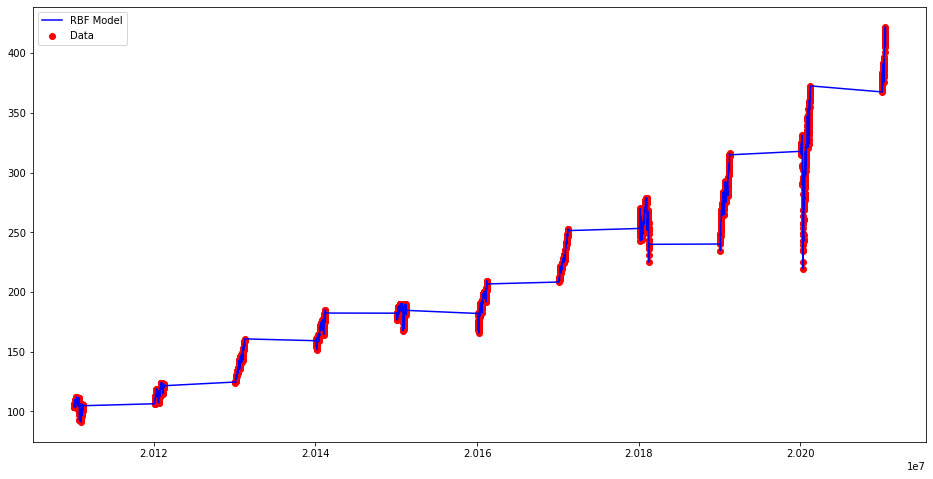

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, rbf.predict(days), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(rbf.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [264.378901]
The percent error for this is:  91.9159824669557 %


In [ ]:
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

The predicted value on 2021-05-05 from the rbf model is:  [414.94340512]
The percent error for this is:  87.31269438319575 %


# Linear

In [ ]:
lin = SVR(kernel= 'linear',C= 1E-8)
lin.fit(days, close_prices) 

SVR(C=1e-08, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

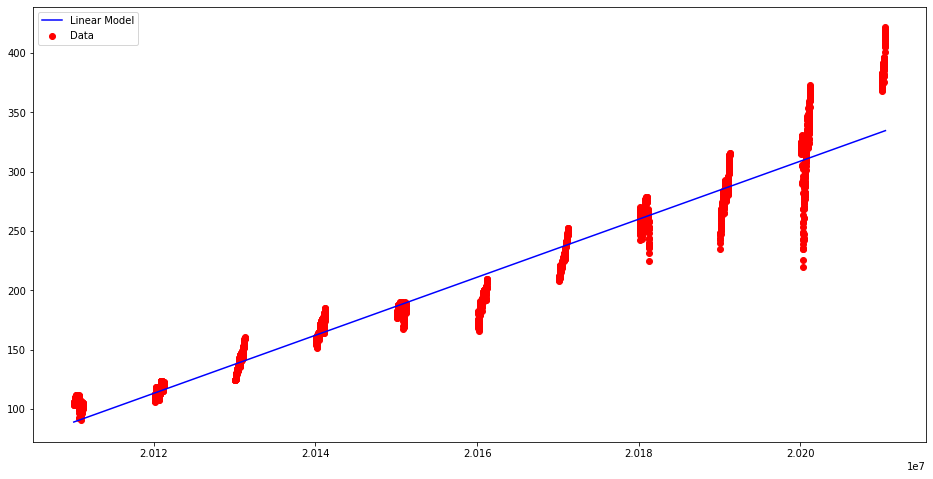

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days,close_prices, color= 'red', label= 'Data')
plt.plot(days, lin.predict(days), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' ,lin.predict(day))
print('The percent error for this is: ', float((abs(3270.39-(lin.predict(day)))/3270.39)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [334.56931818]
The percent error for this is:  89.76974250214106 %


# 05-02-2020 - Now 

In [ ]:
spy_df2 = SPYData.history(period='1d', start= '2020-5-2', end = '2021-5-18')

In [ ]:
spy_df2


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-04,276.308950,279.419078,274.724375,279.094299,80873200,0.0,0
2020-05-05,282.115822,284.684613,279.232045,281.672913,79569900,0.0,0
2020-05-06,283.493739,283.907093,279.300967,279.763550,73632600,0.0,0
2020-05-07,283.208307,285.206265,282.598097,283.139404,75250400,0.0,0
2020-05-08,286.495581,288.326240,285.284984,287.824280,76452400,0.0,0
...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0


In [ ]:
df_Open=spy_df2[['Open']]
df_dates2=spy_df2.index.to_frame().reset_index(drop=True)
print(df_dates2)

          Date
0   2020-05-04
1   2020-05-05
2   2020-05-06
3   2020-05-07
4   2020-05-08
..         ...
257 2021-05-11
258 2021-05-12
259 2021-05-13
260 2021-05-14
261 2021-05-17

[262 rows x 1 columns]


In [ ]:
spy_df2['Date']= df_dates2['Date'].values

In [ ]:
spy_df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-05-04,276.308950,279.419078,274.724375,279.094299,80873200,0.0,0,2020-05-04
2020-05-05,282.115822,284.684613,279.232045,281.672913,79569900,0.0,0,2020-05-05
2020-05-06,283.493739,283.907093,279.300967,279.763550,73632600,0.0,0,2020-05-06
2020-05-07,283.208307,285.206265,282.598097,283.139404,75250400,0.0,0,2020-05-07
2020-05-08,286.495581,288.326240,285.284984,287.824280,76452400,0.0,0,2020-05-08
...,...,...,...,...,...,...,...,...
2021-05-11,413.100006,415.269989,410.059998,414.209991,116888000,0.0,0,2021-05-11
2021-05-12,411.230011,412.589996,404.000000,405.410004,134811000,0.0,0,2021-05-12
2021-05-13,407.070007,412.350006,407.019989,410.279999,106394000,0.0,0,2021-05-13


In [ ]:
spy_df2['Date'] = spy_df2['Date'].astype(str)

In [ ]:
spy_df2['new_date'] = spy_df2['Date'].str.replace('\D', '').astype(int)

In [ ]:
actual_price2 = spy_df2.tail(1)
actual_price2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,new_date
Date,,,,,,,,,
2021-05-17,415.390015,416.390015,413.359985,415.519989,65129200,0.0,0,2021-05-17,20210517


In [ ]:
spy_df2 = spy_df2.head(len(spy_df2)-1)

In [ ]:
days2 = list()
close_prices2= list()

In [ ]:
df_days2 = spy_df2.loc[:,'new_date']
df_days2

Date
2020-05-04    20200504
2020-05-05    20200505
2020-05-06    20200506
2020-05-07    20200507
2020-05-08    20200508
                ...   
2021-05-10    20210510
2021-05-11    20210511
2021-05-12    20210512
2021-05-13    20210513
2021-05-14    20210514
Name: new_date, Length: 261, dtype: int64

In [ ]:
df_close_price2 = spy_df2.loc[:,'Close']

In [ ]:
for dates2 in df_days2:
  days2.append([int(dates2)])

days2

In [ ]:
for price2 in df_close_price2: 
  close_prices2.append(float(price2))

close_prices2

In [ ]:
print(days2)
print(close_prices2)

print(len(days2))
print(len(close_prices2))

In [ ]:
rbf = SVR(kernel= 'rbf', C= 1000.0, gamma= 0.1)
rbf.fit(days2, close_prices2)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

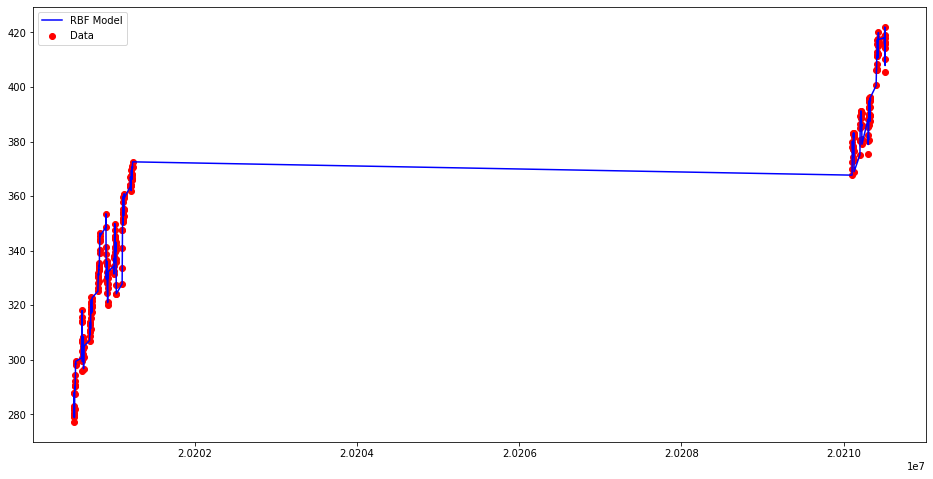

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(days2,close_prices2, color= 'red', label= 'Data')
plt.plot(days2, rbf.predict(days2), color='blue', label='RBF Model')
plt.legend()
plt.show()

In [ ]:
day= [[20210517]]
print('The predicted value on 2021-05-04 from the rbf model is: ' , rbf.predict(day))
print('The percent error for this is: ', float((abs(415.52-(rbf.predict(day)))/415.52)*100),'%')

The predicted value on 2021-05-04 from the rbf model is:  [384.08205516]
The percent error for this is:  7.5659281961842195 %


In [ ]:
#Today
may_sixth = [[20210505]]
print('The predicted value on 2021-05-05 from the rbf model is: ' , rbf.predict(may_sixth))
print('The percent error for this is: ', float((abs(3270.54-(rbf.predict(may_sixth)))/3270.54)*100),'%')

In [ ]:
#Tomorrow
tomorrow = [[20210518]]
print('The predicted value on 2021-05-06 from the rbf model is: ' , rbf.predict(tomorrow))
#print('It\'s predicted to drop: ' , float(((3161.45796-3249.386427)/3249.386427)*100), '%')

The predicted value on 2021-05-06 from the rbf model is:  [367.65014013]


In [ ]:
twoDays = [[20210507]]
print('The predicted value on 2021-05-07 from the rbf model is: ' , rbf.predict(twoDays))